<a href="https://colab.research.google.com/github/Kyamzzz/GISMA/blob/main/Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Business Problem Understanding

Customer churn prediction is an important business problem for many companies. By identifying the customers who are likely to leave, companies can take proactive measures to retain them and improve customer satisfaction, which ultimately leads to increased revenue.

The data I have chosen is a hypothetical telecommunication company data. The Telco Customer Churn dataset contains information about telecom customers and whether they have churned or not, as well as demographic, account, and usage data. I have downloaded from Kaggle (https://www.kaggle.com/blastchar/telco-customer-churn).

Machine learning is well-suited for this task because it can help identify patterns in the data that might be difficult for humans to detect. By analyzing historical customer data, machine learning models can learn to predict which customers are likely to churn in the future. This information can then be used by companies to take actions that reduce the risk of churn, such as offering incentives or improving customer service.

## 2. Data Collection


### 2.1 Importing Libraries


In [ ]:
import pandas as pd # data manipulation and analysis
import numpy as np # numerical computing
import sklearn.model_selection # split dataset into random train and test subset
import matplotlib.pyplot as plt # for creating visualization
import sklearn.svm # ML Algorith
import sklearn.metrics # ML Algorith
import sklearn.preprocessing # Data Pre-processing and Feature Egieering
import sklearn.decomposition # Dimensionality Reduction
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report # Performance Evaluation of the model
import seaborn as sns # Data Visualization
import sklearn.model_selection # Splitting the data
from collections import Counter # To count the occurace of element
from sklearn.datasets import make_classification # To make classification
from imblearn.over_sampling import SMOTE # To balance the data
from IPython.display import IFrame # To attcah another HTML file to the notebook


### 2.2 Uploading the dataset

In [ ]:
df = pd.read_csv('M505C_Telco-Customer-Churn.csv') # Uploading the dataset from local drive
df.head() # Shows the columns and the first 5 rows of the dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 2.3 Split the datatset into train and test

In [ ]:
## Splitting the Data into test ad train. Splitting the data row wise so that I can rectify data quality issues. If I would have seperated x and y, the it would have been difficult to rectify data quality issues.
df_train, df_test = sklearn.model_selection.train_test_split(df)
print ("df_train size:", df_train.shape)
print ("df_test size:", df_test.shape)

df_train size: (5282, 21)
df_test size: (1761, 21)


## 3. Data Exploration

### 3.1 Visualizing Datapoints and Features

In [ ]:
df.info() # summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df['gender'].value_counts() ## The data seems equally split between Males and Females

Male      3555
Female    3488
Name: gender, dtype: int64

In [ ]:
df['SeniorCitizen'].value_counts() ## Most of the customers are not senior citizens

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [ ]:
df['Partner'].value_counts() ## People who do not have a partner are slighty more than people with partners

No     3641
Yes    3402
Name: Partner, dtype: int64

In [ ]:
df['Dependents'].value_counts() ## Most of the people do not have dependents

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [ ]:
df['PhoneService'].value_counts() ## Most of the customers have Phone services

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [ ]:
df['InternetService'].value_counts() ## Most of the customers have Fiber optic internet service, followed by DSL and last are the people with no Iternet Services

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [ ]:
df['Contract'].value_counts() ## Most of the customers have month to moth contracts, followed by two year contract and lastly one year contracts

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

### 3.2 Identifying Data Quality Issues

In [ ]:
# Converting TotalCharges from object to numeric (in both train and test data)
df_train.TotalCharges = pd.to_numeric(df_train.TotalCharges, errors='coerce')
df_test.TotalCharges = pd.to_numeric(df_test.TotalCharges, errors='coerce')
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5282 entries, 1467 to 1131
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5282 non-null   object 
 1   gender            5282 non-null   object 
 2   SeniorCitizen     5282 non-null   int64  
 3   Partner           5282 non-null   object 
 4   Dependents        5282 non-null   object 
 5   tenure            5282 non-null   int64  
 6   PhoneService      5282 non-null   object 
 7   MultipleLines     5282 non-null   object 
 8   InternetService   5282 non-null   object 
 9   OnlineSecurity    5282 non-null   object 
 10  OnlineBackup      5282 non-null   object 
 11  DeviceProtection  5282 non-null   object 
 12  TechSupport       5282 non-null   object 
 13  StreamingTV       5282 non-null   object 
 14  StreamingMovies   5282 non-null   object 
 15  Contract          5282 non-null   object 
 16  PaperlessBilling  5282 non-null   objec

In [ ]:
## Checking for null values in the dataset (9 null values in train dataset)
df_train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        9
Churn               0
dtype: int64

In [ ]:
df_test.isnull().sum() # 2 null values in test dataset

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        2
Churn               0
dtype: int64

In [ ]:
## Deleting rows null values from both training and test data using the dropna function
df_train.dropna(inplace=True)
df_test.dropna(inplace=True)

In [ ]:
## Confirming if the null values have been removed
df_train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df_test.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
## Dropping customerID column as it's not required for analysis
df_train.drop(["customerID"],axis=1,inplace = True)
df_test.drop(["customerID"],axis=1,inplace = True)

In [ ]:
## Checking if customers been dropped from training and test dataset
df_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1467,Female,0,No,No,23,Yes,Yes,DSL,No,No,No,Yes,Yes,Yes,One year,Yes,Mailed check,73.75,1756.60,No
1374,Male,0,Yes,Yes,45,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,84.35,3858.05,No
5307,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,90.10,90.10,No
5309,Female,0,Yes,No,61,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.25,1278.80,No
3077,Male,0,Yes,No,45,Yes,No,DSL,Yes,No,Yes,No,No,No,Two year,No,Credit card (automatic),53.30,2296.25,No


In [ ]:
df_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3530,Female,0,No,No,17,Yes,Yes,DSL,No,No,Yes,Yes,Yes,No,Month-to-month,Yes,Mailed check,69.00,1108.00,No
5940,Male,0,Yes,Yes,56,Yes,No,Fiber optic,No,Yes,Yes,Yes,No,No,One year,Yes,Mailed check,85.85,4793.80,No
1857,Female,0,Yes,No,65,Yes,No,DSL,Yes,No,Yes,Yes,No,No,Two year,No,Credit card (automatic),58.90,3857.10,No
5982,Male,0,No,No,15,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.80,304.60,No
4644,Male,0,No,No,13,Yes,No,DSL,No,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,50.55,610.75,No


## 4. Data Pre-Processing

### 4.1 Data Transformation

In [ ]:
## Replacing text columns to numeric in both train and test dataset
df_train.gender = [1 if each == "Male" else 0 for each in df_train.gender]

columns_to_convert = ['Partner',
                      'Dependents',
                      'PhoneService',
                      'MultipleLines',
                      'OnlineSecurity',
                      'OnlineBackup',
                      'DeviceProtection',
                      'TechSupport',
                      'StreamingTV',
                      'StreamingMovies',
                      'PaperlessBilling',
                      'Churn']

for item in columns_to_convert:
    df_train[item] = [1 if each == "Yes" else 0 if each == "No" else -1 for each in df_train[item]]


In [ ]:
df_test.gender = [1 if each == "Male" else 0 for each in df_test.gender]

columns_to_convert = ['Partner',
                      'Dependents',
                      'PhoneService',
                      'MultipleLines',
                      'OnlineSecurity',
                      'OnlineBackup',
                      'DeviceProtection',
                      'TechSupport',
                      'StreamingTV',
                      'StreamingMovies',
                      'PaperlessBilling',
                      'Churn']

for item in columns_to_convert:
    df_test[item] = [1 if each == "Yes" else 0 if each == "No" else -1 for each in df_test[item]]


In [ ]:
## Checking if the text columns have been converted to numeric values
df_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1467,0,0,0,0,23,1,1,DSL,0,0,0,1,1,1,One year,1,Mailed check,73.75,1756.60,0
1374,1,0,1,1,45,1,0,DSL,1,1,1,1,1,1,Two year,1,Mailed check,84.35,3858.05,0
5307,1,0,1,1,1,1,0,Fiber optic,0,0,0,0,1,1,Month-to-month,1,Electronic check,90.10,90.10,0
5309,0,0,1,0,61,1,0,No,-1,-1,-1,-1,-1,-1,Two year,0,Credit card (automatic),20.25,1278.80,0
3077,1,0,1,0,45,1,0,DSL,1,0,1,0,0,0,Two year,0,Credit card (automatic),53.30,2296.25,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5273 entries, 1467 to 1131
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5273 non-null   int64  
 1   SeniorCitizen     5273 non-null   int64  
 2   Partner           5273 non-null   int64  
 3   Dependents        5273 non-null   int64  
 4   tenure            5273 non-null   int64  
 5   PhoneService      5273 non-null   int64  
 6   MultipleLines     5273 non-null   int64  
 7   InternetService   5273 non-null   object 
 8   OnlineSecurity    5273 non-null   int64  
 9   OnlineBackup      5273 non-null   int64  
 10  DeviceProtection  5273 non-null   int64  
 11  TechSupport       5273 non-null   int64  
 12  StreamingTV       5273 non-null   int64  
 13  StreamingMovies   5273 non-null   int64  
 14  Contract          5273 non-null   object 
 15  PaperlessBilling  5273 non-null   int64  
 16  PaymentMethod     5273 non-null   objec

In [ ]:
df_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3530,0,0,0,0,17,1,1,DSL,0,0,1,1,1,0,Month-to-month,1,Mailed check,69.00,1108.00,0
5940,1,0,1,1,56,1,0,Fiber optic,0,1,1,1,0,0,One year,1,Mailed check,85.85,4793.80,0
1857,0,0,1,0,65,1,0,DSL,1,0,1,1,0,0,Two year,0,Credit card (automatic),58.90,3857.10,0
5982,1,0,0,0,15,1,0,No,-1,-1,-1,-1,-1,-1,One year,0,Mailed check,19.80,304.60,0
4644,1,0,0,0,13,1,0,DSL,0,0,0,1,0,0,Month-to-month,1,Mailed check,50.55,610.75,0


In [ ]:
## converting the remaining categorical variables into dummy variables using Pandas 'get_dummies' one hot encoder
df_train = pd.get_dummies(df_train)
df_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1467,0,0,0,0,23,1,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1374,1,0,1,1,45,1,0,1,1,1,...,1,0,0,0,0,1,0,0,0,1
5307,1,0,1,1,1,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
5309,0,0,1,0,61,1,0,-1,-1,-1,...,0,0,1,0,0,1,0,1,0,0
3077,1,0,1,0,45,1,0,1,0,1,...,1,0,0,0,0,1,0,1,0,0


In [ ]:
df_test = pd.get_dummies(df_test)
df_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3530,0,0,0,0,17,1,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
5940,1,0,1,1,56,1,0,0,1,1,...,0,1,0,0,1,0,0,0,0,1
1857,0,0,1,0,65,1,0,1,0,1,...,1,0,0,0,0,1,0,1,0,0
5982,1,0,0,0,15,1,0,-1,-1,-1,...,0,0,1,0,1,0,0,0,0,1
4644,1,0,0,0,13,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


### 4.2 Corelation Analysis

In [ ]:
df_train.corr()['Churn'].sort_values()

tenure                                    -0.350802
Contract_Two year                         -0.303987
InternetService_No                        -0.232887
TotalCharges                              -0.194648
Contract_One year                         -0.176898
Dependents                                -0.171747
Partner                                   -0.147558
PaymentMethod_Credit card (automatic)     -0.135139
InternetService_DSL                       -0.118443
PaymentMethod_Bank transfer (automatic)   -0.111515
PaymentMethod_Mailed check                -0.090182
gender                                    -0.004191
PhoneService                               0.011031
TechSupport                                0.028031
OnlineSecurity                             0.029856
MultipleLines                              0.037056
OnlineBackup                               0.077474
DeviceProtection                           0.088729
SeniorCitizen                              0.160992
StreamingTV 

<Axes: >

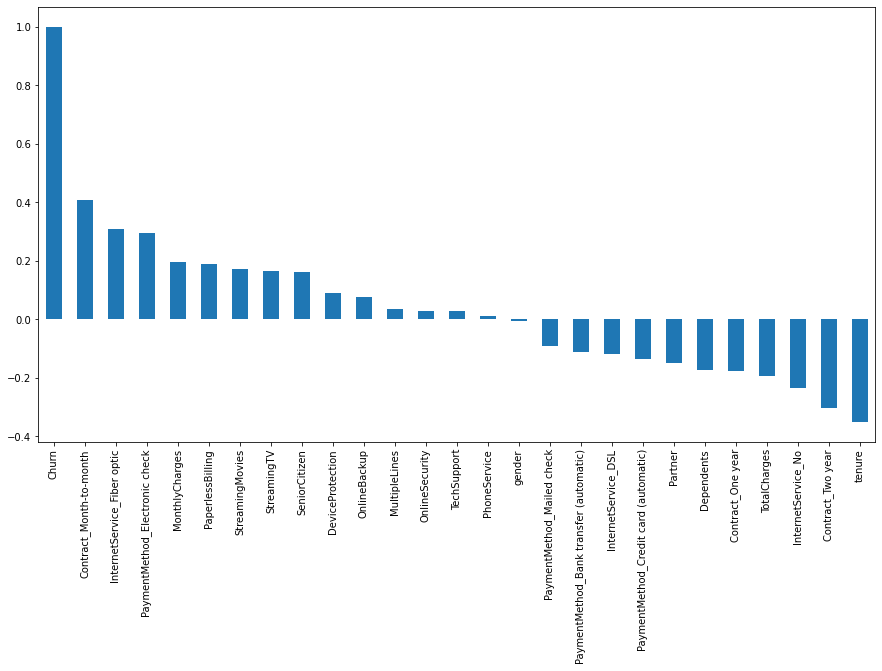

In [ ]:
plt.figure(figsize=(15,8))
df_train.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

### From the bargraph and the corelation analysis, we can see that customers having a month to month contract, fiber optic iternet and Electronic check as a payment method tend to churn. Whereas people having a two year contract and do not have an Internet Service tend not to churn.

### 5. Feature Engineering

This code split the dataset into training and testing sets for machine learning models.

In [ ]:
## Seperating the Features and the Target Variable
x_train = df_train.drop(["Churn"], axis=1)
y_train = df_train["Churn"]

x_test = df_test.drop(["Churn"], axis=1)
y_test = df_test["Churn"]

print("x_train size", x_train.shape)
print("x_test size", x_test.shape)
print("y_train size", y_train.shape)
print("y_test size", y_test.shape)

x_train size (5273, 26)
x_test size (1759, 26)
y_train size (5273,)
y_test size (1759,)


Standard Scaler is used to scale and center the data, so that the features are on the same scale and easier to compare. The purpose of this code is to transform the data so that each feature has a mean of 0 and a variance of 1.

In [ ]:
## Building a Standardization Model
scaler = sklearn.preprocessing.StandardScaler(with_mean = False)
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
print ("x_train:",x_train.shape)
print ("x_test:",x_test.shape)

x_train: (5273, 26)
x_test: (1759, 26)


This code generates a synthetic dataset with two classes using the make_classification function from the sklearn.datasets module. The first argument n_classes=2 specifies that there are two classes in the dataset. The weights argument is set to [0.1, 0.9], which means that the first class has 10% of the samples and the second class has 90% of the samples, making this an imbalanced dataset.

The other arguments control the characteristics of the synthetic dataset. class_sep controls the separation between the two classes. n_informative and n_redundant control the number of informative and redundant features, respectively. flip_y controls the percentage of labels that are flipped from their original values. n_features controls the total number of features in the dataset. n_clusters_per_class controls the number of clusters per class, and n_samples specifies the total number of samples in the dataset. The random_state argument sets the random seed for reproducibility.

Finally, the code prints the original dataset shape using the Counter function from the collections module, which counts the number of samples for each class. This allows you to see that the dataset is indeed imbalanced, with 10% of the samples in one class and 90% of the samples in the other class.

In [ ]:
## Handling Imbalanced Classes
x, y = make_classification(n_classes=2, class_sep=2,
weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0,
n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({1: 900, 0: 100})


I am using SMOTE (Synthetic Minority Over-sampling Technique) algorithm from the imblearn library to resample the dataset and balance the number of samples in each class. The purpose of this code is to address the problem of imbalanced classes, where one class has significantly fewer samples than the other.

In [ ]:
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 900, 1: 900})


Applying the KNN Machine learning Algorithm to train the classification model

In [ ]:
### KNN Classifier Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)

This code computes the accuracy of the KNN model predictions on the test set.

In [ ]:
### KNN Accuracy Score
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred_knn)
accuracy= accuracy*100
accuracy

78.62421830585559

This code generates a confusion matrix plot for the KNN model predictions on the test set. From the KNN confusion matrix, we can see that:

TN (True Negatives) - 1078
FP (False Positives) - 224
FN (False Negatives) - 197
TP (True Negatives) - 259

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

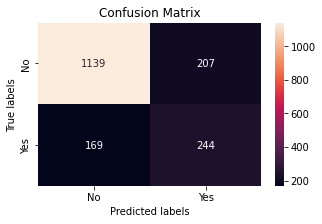

In [ ]:
### KNN Confusion Matrix
cm_knn = confusion_matrix(y_pred_knn, y_test)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_knn, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes']) ; ax.yaxis.set_ticklabels(['No', 'Yes'])

In [ ]:
### KNN Classification Report
print(classification_report(y_test, y_pred_knn, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.85      0.87      0.86      1308
         Yes       0.59      0.54      0.56       451

    accuracy                           0.79      1759
   macro avg       0.72      0.71      0.71      1759
weighted avg       0.78      0.79      0.78      1759



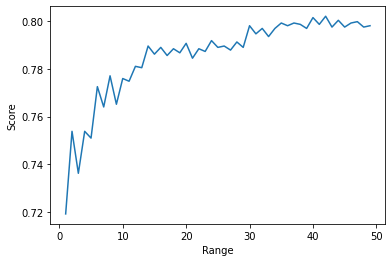

In [ ]:
score_array = []
for each in range(1,50):
    knn_loop = KNeighborsClassifier(n_neighbors = each)
    knn_loop.fit(x_train,y_train)
    score_array.append(knn_loop.score(x_test,y_test))

plt.plot(range(1,50),score_array)
plt.xlabel("Range")
plt.ylabel("Score")
plt.show()

In [ ]:
### Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 1000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
### Logistic Regression Accuracy
y_pred_lr = lr.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred_lr)
accuracy= accuracy*100
accuracy

81.75099488345651

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

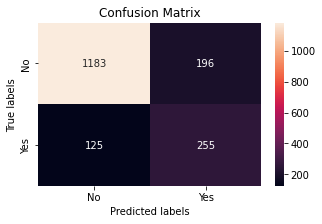

In [ ]:
### Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(y_pred_lr, y_test)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_lr, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes']) ; ax.yaxis.set_ticklabels(['No', 'Yes'])


In [ ]:
### Logistic Regression Classification Report
print(classification_report(y_test, y_pred_lr, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.86      0.90      0.88      1308
         Yes       0.67      0.57      0.61       451

    accuracy                           0.82      1759
   macro avg       0.76      0.73      0.75      1759
weighted avg       0.81      0.82      0.81      1759



In [ ]:
### Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred_dtc = dtc.predict(x_test)

In [ ]:
# To check the accuracy of the decision model
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred_dtc)
accuracy= accuracy*100
accuracy

71.51790790221717

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

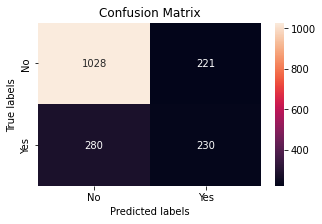

In [ ]:
### Decision Tree Confusion Matrix
cm_dtc = confusion_matrix(y_pred_dtc, y_test)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_dtc, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes']) ; ax.yaxis.set_ticklabels(['No', 'Yes'])


In [ ]:
### Decision Tree Classification Report
print(classification_report(y_test, y_pred_dtc, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.82      0.79      0.80      1308
         Yes       0.45      0.51      0.48       451

    accuracy                           0.72      1759
   macro avg       0.64      0.65      0.64      1759
weighted avg       0.73      0.72      0.72      1759



In [ ]:
### SVM Classification
from sklearn.svm import SVC
svc = SVC(random_state = 10)
svc.fit(x_train,y_train)
y_pred_svm = svc.predict(x_test)

In [ ]:
# To check the accuracy of the SVM model
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred_svm)
accuracy= accuracy*100
accuracy

81.46674246731097

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

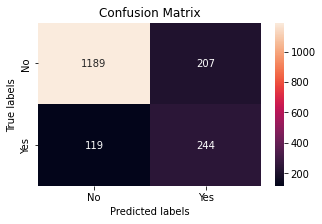

In [ ]:
### SVM Confusion Matrix
cm_svm = confusion_matrix(y_pred_svm, y_test)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_svm, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes']) ; ax.yaxis.set_ticklabels(['No', 'Yes'])

In [ ]:
### SVM Classification Report
print(classification_report(y_test, y_pred_svm, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.85      0.91      0.88      1308
         Yes       0.67      0.54      0.60       451

    accuracy                           0.81      1759
   macro avg       0.76      0.73      0.74      1759
weighted avg       0.81      0.81      0.81      1759



In [ ]:
### Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)

In [ ]:
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred_nb)
accuracy= accuracy*100
accuracy

71.34735645252984

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

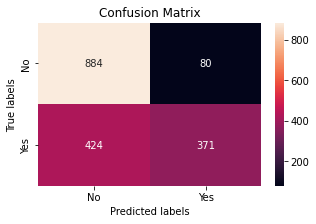

In [ ]:
### Naive Bayes Confusion Matrix
cm_nb = confusion_matrix(y_pred_nb, y_test)
f, ax= plt.subplots(1,1,figsize=(5,3))
sns.heatmap(cm_nb, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels') ; ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No', 'Yes']) ; ax.yaxis.set_ticklabels(['No', 'Yes'])

In [ ]:
### Naive Bayes Classification Report
print(classification_report(y_test, y_pred_nb, target_names=['No', 'Yes']))

              precision    recall  f1-score   support

          No       0.92      0.68      0.78      1308
         Yes       0.47      0.82      0.60       451

    accuracy                           0.71      1759
   macro avg       0.69      0.75      0.69      1759
weighted avg       0.80      0.71      0.73      1759



As we can see that Logistic Regression has the best accuracy and the F1 score, I will finetune the hyperparameters of the Logistic Regression model to get the best prediction.

In [ ]:
### Fine Tuning the model
param_grid = {'C' : np.logspace(-4, 4, 20)}

final_model = LogisticRegression(random_state = 42)
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(final_model, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1,
                       return_train_score = True)
grid_cv.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])},
             return_train_score=True, verbose=True)

In [ ]:
best_estimator = grid_cv.best_estimator_
best_estimator

LogisticRegression(C=0.23357214690901212, random_state=42)

In [ ]:
y_pred_lr = best_estimator.predict(x_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", accuracy*100)

# Compute f1 score
f1 = f1_score(y_test, y_pred_lr)
print("F1 score:", f1*100)

# Compute precision
precision = precision_score(y_test, y_pred_lr)
print("Precision:", precision*100)

Accuracy: 81.6941444002274
F1 score: 61.20481927710843
Precision: 67.01846965699208


In [ ]:
def print_scores(headline, y_true, y_pred):
    print(headline)
    acc_score = accuracy_score(y_true, y_pred)
    print("accuracy: ",acc_score)
    pre_score = precision_score(y_true, y_pred)
    print("precision: ",pre_score)
    rec_score = recall_score(y_true, y_pred)
    print("recall: ",rec_score)
    f_score = f1_score(y_true, y_pred, average='weighted')
    print("f1_score: ",f_score)

In [ ]:
print_scores("Logistic Regression;",y_test, y_pred_lr)
print_scores("SVC;",y_test, y_pred_svm)
print_scores("KNN;",y_test, y_pred_knn)
print_scores("Naive Bayes;",y_test, y_pred_nb)
print_scores("Decision Tree;",y_test, y_pred_dtc)

Logistic Regression;
accuracy:  0.816941444002274
precision:  0.6701846965699209
recall:  0.5631929046563193
f1_score:  0.8114532319157243
SVC;
accuracy:  0.8146674246731097
precision:  0.6721763085399449
recall:  0.541019955654102
f1_score:  0.8076652143866908
KNN;
accuracy:  0.786242183058556
precision:  0.5907990314769975
recall:  0.541019955654102
f1_score:  0.7830717836639585
Naive Bayes;
accuracy:  0.7134735645252984
precision:  0.4666666666666667
recall:  0.8226164079822617
f1_score:  0.7313349085448553
Decision Tree;
accuracy:  0.7151790790221717
precision:  0.45098039215686275
recall:  0.5099778270509978
f1_score:  0.7206363142469665


# Conclusion

Based on the provided scores, we can see that logistic regression and SVM have the highest accuracy, which indicates that they are better at predicting which customers might churn. Naive Bayes has a higher recall score, which indicates that it is better at identifying the positive class when it is present. However, Naive Bayes has a lower precision score, which means that it may make more false positive predictions than the other models.

The F1-score is a balanced metric that takes into account both precision and recall, and we can see that logistic regression and SVM have the highest F1-scores among the models.

Overall, it appears that logistic regression and SVM are the most effective models to predict if a customer will churn or not.




In [ ]:
 !jupyter nbconvert --to html Churn.ipynb

[NbConvertApp] Converting notebook Churn.ipynb to html
[NbConvertApp] Writing 1193678 bytes to Churn.html
